# Regularization:
 When your model memorizes the training data (overfitting), it fails to work well on new data.
 Regularization is a technique that penalizes complex models to prevent overfitting. Regularization adds a penalty to the model's loss function — it discourages large or unnecessary weights.

# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# import datas
df = pd.read_csv('advertising.csv')



In [5]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)  
print(X_train.shape, X_test.shape)

(140, 3) (60, 3)


L2 Regularization (Ridge):  The squared sum of coefficients 

In [7]:
# Modeling Ridge with default parameters
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)


# Prediction 
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# Evaluation
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, test_pred)
train_mse = mean_squared_error(y_train, train_pred)
print("Test MSE:", test_mse)
print("Train MSE:", train_mse)



Ridge Coefficients: [0.05358867 0.10270294 0.00793246]
Ridge Intercept: 4.743835255088639
Test MSE: 2.5416451037747483
Train MSE: 2.8392326635229193


In [10]:
# Hyperparameter Tuning of Ridge 
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best Alpha:", ridge_cv.best_params_['alpha'])
print("Best MSE:", -ridge_cv.best_score_)
# Best model
best_ridge = ridge_cv.best_estimator_
best_test_pred = best_ridge.predict(X_test)
best_train_pred = best_ridge.predict(X_train)

# Evaluation of Best Model
best_test_mse = mean_squared_error(y_test, best_test_pred)
best_train_mse = mean_squared_error(y_train, best_train_pred)
print("Best Test MSE:", best_test_mse)
print("Best Train MSE:", best_train_mse)




Best Alpha: 1000
Best MSE: 3.032010478404186
Best Test MSE: 2.564361099286008
Best Train MSE: 2.841795937904301


L1 Reularization (Lasso): Modifies overfitted or under-fitted models by adding a penalty equivalent to the sum of the absolute values ​​of the coefficients. 

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
print("Lasso Coefficients:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)
# Prediction
lasso_test_pred = lasso.predict(X_test)
lasso_train_pred = lasso.predict(X_train)
# Evaluation
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
print("Lasso Test MSE:", lasso_test_mse)
print("Lasso Train MSE:", lasso_train_mse)

Lasso Coefficients: [0.05350286 0.09870028 0.00656003]
Lasso Intercept: 4.893206377430953
Lasso Test MSE: 2.52905678067919
Lasso Train MSE: 2.8446961902340533


In [12]:
# Hyperparameter Tuning of Lasso: 
param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000]}
lasso_cv = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print("Best Alpha for Lasso:", lasso_cv.best_params_['alpha'])
print("Best MSE for Lasso:", -lasso_cv.best_score_)
# Best model
best_lasso = lasso_cv.best_estimator_
best_lasso_test_pred = best_lasso.predict(X_test)
best_lasso_train_pred = best_lasso.predict(X_train)
# Evaluation of Best Lasso Model
best_lasso_test_mse = mean_squared_error(y_test, best_lasso_test_pred)
best_lasso_train_mse = mean_squared_error(y_train, best_lasso_train_pred)
print("Best Lasso Test MSE:", best_lasso_test_mse)
print("Best Lasso Train MSE:", best_lasso_train_mse)

Best Alpha for Lasso: 0.1
Best MSE for Lasso: 3.033961824614377
Best Lasso Test MSE: 2.5397762434037605
Best Lasso Train MSE: 2.839287204310359


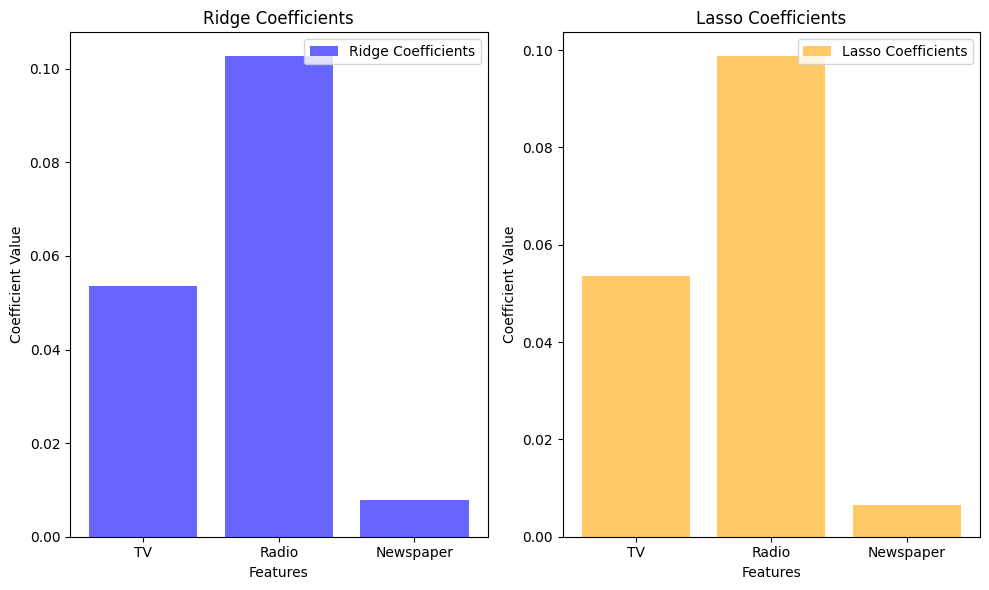

In [14]:
# L2 Regularization (Ridge):  The squared sum of coefficients
# L1 Reularization (Lasso): Modifies overfitted or under-fitted models by adding a penalty equivalent to the sum of the absolute values ​​of the coefficients. 



# Visualizing the coefficientsplt.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(X.columns, ridge.coef_, color='blue', alpha=0.6, label='Ridge Coefficients')
plt.title('Ridge Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.subplot(1, 2, 2)
plt.bar(X.columns, lasso.coef_, color='orange', alpha=0.6, label='Lasso Coefficients')
plt.title('Lasso Coefficients')
plt.xlabel('Features')  
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()